importing basic libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading in my dataset

In [77]:
data = pd.read_csv("loan_dataset.csv")
data.head()

,Age,Occupation,Amount,Loan_term,Late_repayment_%,Loan_application_%,Previous_default_%,Interest_rate_%,Payday_indicator,Default_rate_%,Day_of_month
0,33,1,10000,1,10,10,0,20,1,30,23
1,17,0,20000,1,50,20,30,20,1,60,17
2,21,0,5000,1,20,60,20,20,0,10,8
3,60,2,5000,1,5,70,40,20,1,60,4
4,55,2,25000,1,20,50,30,20,0,50,15


Exploratory Data Analysis

In [78]:
data.describe()

,Age,Occupation,Amount,Loan_term,Late_repayment_%,Loan_application_%,Previous_default_%,Interest_rate_%,Payday_indicator,Default_rate_%,Day_of_month
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,43.025000,1.237500,40697.500000,1.254167,43.895833,45.562500,40.125000,20.333333,0.520833,46.020833,15.837500
std,16.043071,0.847004,36252.624692,1.219603,29.414253,22.464203,27.424011,3.151232,0.500610,28.289810,9.740281
min,14.000000,0.000000,2000.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000
25%,22.000000,0.000000,10000.000000,1.000000,20.000000,30.000000,20.000000,20.000000,0.000000,20.000000,6.000000
50%,48.000000,2.000000,30000.000000,1.000000,40.000000,50.000000,30.000000,20.000000,1.000000,45.000000,16.500000
75%,58.000000,2.000000,56250.000000,1.000000,70.000000,70.000000,60.000000,20.000000,1.000000,62.500000,25.000000
max,62.000000,2.000000,200000.000000,11.000000,100.000000,80.000000,100.000000,60.000000,1.000000,100.000000,30.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 240 non-null    int64
 1   Occupation          240 non-null    int64
 2   Amount              240 non-null    int64
 3   Loan_term           240 non-null    int64
 4   Late_repayment_%    240 non-null    int64
 5   Loan_application_%  240 non-null    int64
 6   Previous_default_%  240 non-null    int64
 7   Interest_rate_%     240 non-null    int64
 8   Payday_indicator    240 non-null    int64
 9   Default_rate_%      240 non-null    int64
 10  Day_of_month        240 non-null    int64
dtypes: int64(11)
memory usage: 20.8 KB


In [80]:
len(data)

240

In [81]:
data.shape

(240, 11)

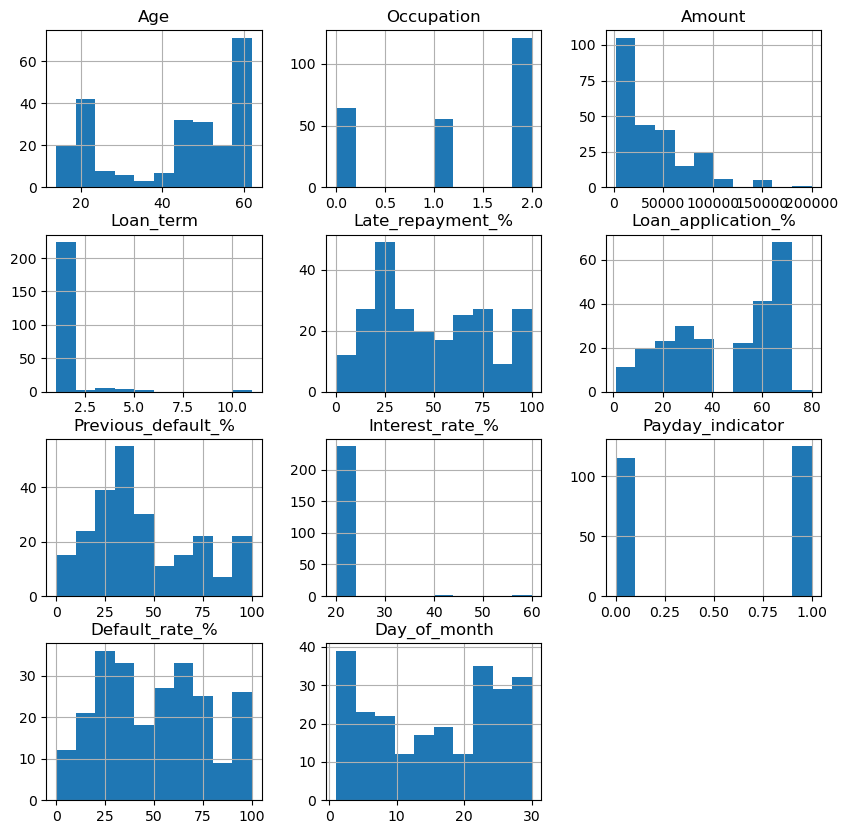

In [82]:
data.hist(figsize=(10,10))
plt.show()

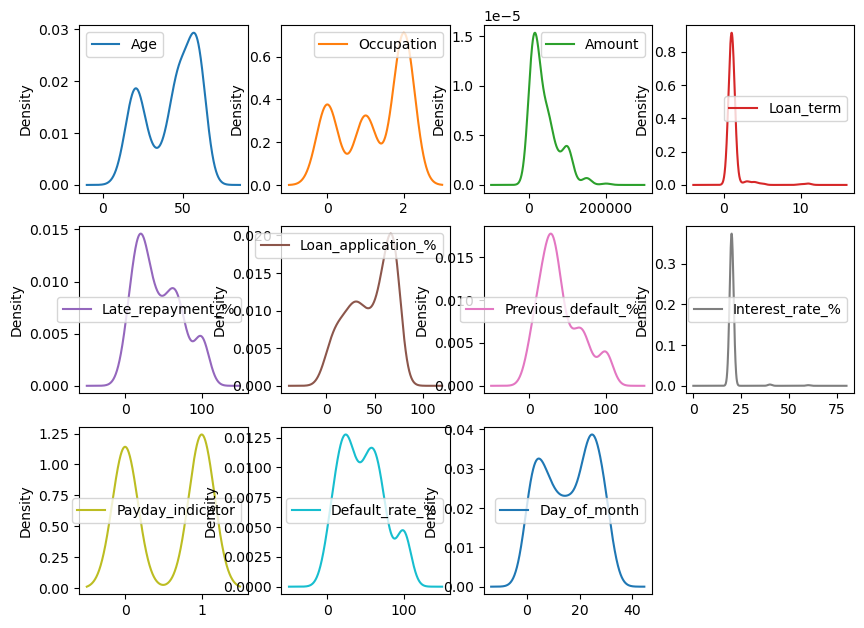

In [83]:
data.plot(kind='density',subplots=True,sharex=False,layout=(4,4),figsize=(10,10))
plt.show()

<Axes: xlabel='Late_repayment_%', ylabel='Default_rate_%'>

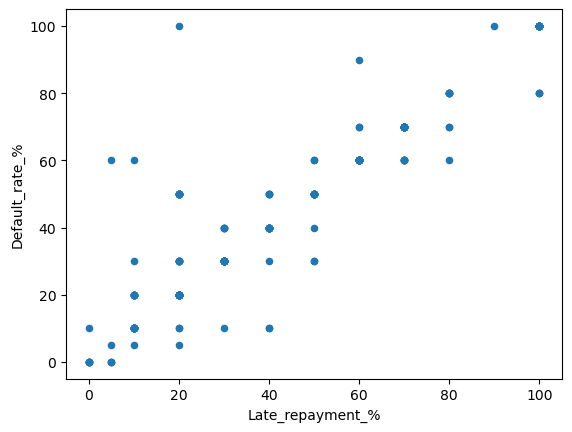

In [84]:
data.plot(kind='scatter',x='Late_repayment_%',y='Default_rate_%')

<Axes: xlabel='Amount', ylabel='Default_rate_%'>

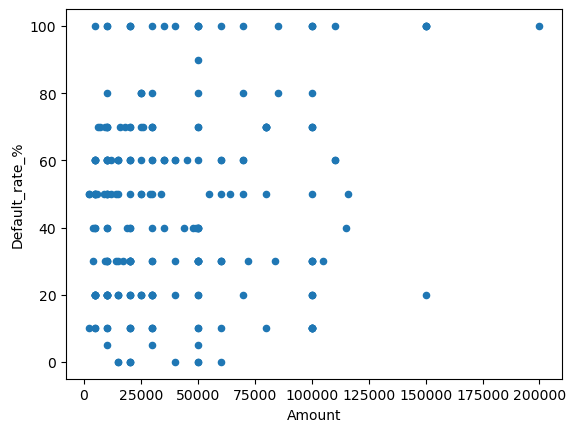

In [85]:
data.plot(kind='scatter',x='Amount',y='Default_rate_%')

In [86]:
corr = data.corr()
corr

,Age,Occupation,Amount,Loan_term,Late_repayment_%,Loan_application_%,Previous_default_%,Interest_rate_%,Payday_indicator,Default_rate_%,Day_of_month
Age,1.000000,0.878963,0.274141,0.157490,0.169100,0.237532,0.171364,0.051147,0.057242,0.246506,0.055479
Occupation,0.878963,1.000000,0.221542,0.164092,0.107136,0.183163,0.096887,0.064272,0.003084,0.164456,0.019405
Amount,0.274141,0.221542,1.000000,0.315929,0.220092,-0.063462,0.205882,0.166433,0.127312,0.197892,0.118059
Loan_term,0.157490,0.164092,0.315929,1.000000,-0.000892,0.088835,0.046584,0.130280,0.090660,-0.003307,0.150719
Late_repayment_%,0.169100,0.107136,0.220092,-0.000892,1.000000,0.080571,0.904130,0.058156,0.080420,0.922404,0.056400
Loan_application_%,0.237532,0.183163,-0.063462,0.088835,0.080571,1.000000,0.107670,-0.013299,0.117454,0.093077,0.161276
Previous_default_%,0.171364,0.096887,0.205882,0.046584,0.904130,0.107670,1.000000,0.057615,0.065335,0.907904,0.033049
Interest_rate_%,0.051147,0.064272,0.166433,0.130280,0.058156,-0.013299,0.057615,1.000000,-0.057466,0.052488,-0.096376
Payday_indicator,0.057242,0.003084,0.127312,0.090660,0.080420,0.117454,0.065335,-0.057466,1.000000,0.089341,0.809444
Default_rate_%,0.246506,0.164456,0.197892,-0.003307,0.922404,0.093077,0.907904,0.052488,0.089341,1.000000,0.052915


<Axes: >

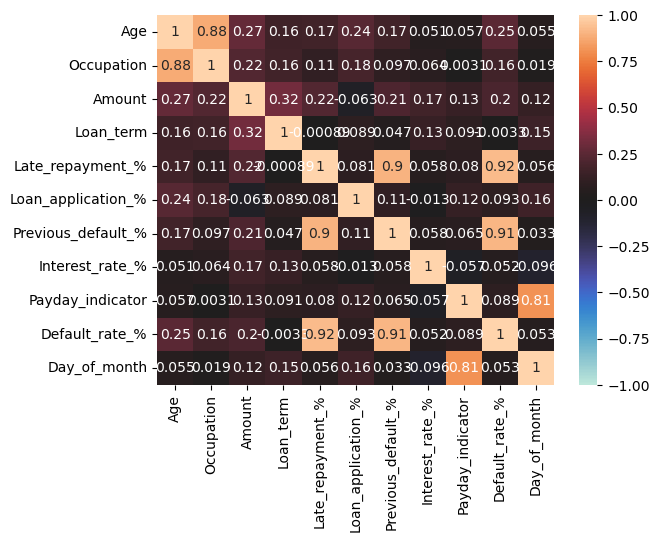

In [87]:
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [117]:
x = data.drop(columns=['Default_rate_%'])
y = data['Default_rate_%']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=True)

training algorithm and accuracy_score

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix 

training the algorithm

In [136]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [137]:
pred = model.predict(xtest)
pred

array([ 49.44308176,  36.05499639,  81.63294289,  16.53132588,
         5.17362438,  31.62657004,  19.93928044,  35.28101558,
       104.48458819,  25.13127825,  35.58450317,  76.16365617,
        17.04886701,  21.24197528,  40.8433476 ,  38.13370877,
       101.25438036,  40.83755097,  40.44320375,  40.07672648,
        31.40518966,  51.3932642 ,  92.28181055,  20.11986422,
        17.23190826,   8.50860452,  21.19464711,  71.31609499,
        37.14150603,  79.90592654,  14.97209887,  24.47698387,
        17.49507426, 102.23616282,  44.1717085 , 103.21556385,
        51.79894021,  40.33249546, 104.32522924,  31.1676633 ,
        63.18582841, 101.21625491,  70.79937025,  29.62900327,
        51.85736828,  33.18920187,  63.68032081,  55.5121276 ])

In [138]:
score = r2_score(ytest,pred)
score

0.9082520306007393

In [139]:
import joblib

In [141]:
joblib.dump(model,'default_loan_prediction_model') 

['default_loan_prediction_model']